Import all necessary modules into the project.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Read in the Wine dataset as a dataframe and view the data.

In [7]:
df = pd.read_csv('wine.csv')

df

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Plot the distributions of these features by "Cultivar":
- Alcalinity of ash
- Flavanoids
- Hue
- Proline

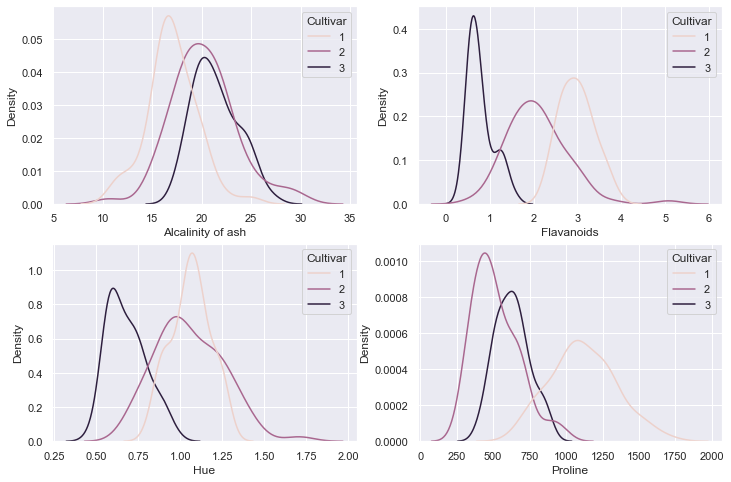

In [8]:
sb.set(style='darkgrid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

sb.kdeplot(data=df, x='Alcalinity of ash', hue='Cultivar', ax=ax[0,0])
sb.kdeplot(data=df, x='Flavanoids', hue='Cultivar', ax=ax[0,1])
sb.kdeplot(data=df, x='Hue', hue='Cultivar', ax=ax[1,0])
sb.kdeplot(data=df, x='Proline', hue='Cultivar', ax=ax[1,1])

plt.show()

Convert the dataframe into a numpy array; include all columns except "Cultivar".

Print out the numpy array.

In [9]:
X = df.loc[:, 'Alcohol':].values
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

Performance standardization (scaling) on the numpy array.

In [10]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

Plot the previous features by "Cultivar" with the scaled data.

In [23]:
df['Cultivar']

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Cultivar, Length: 178, dtype: int64

Plot these features again, by "Cultivar", after scaling:
- Alcalinity of ash
- Flavanoids
- Hue
- Proline

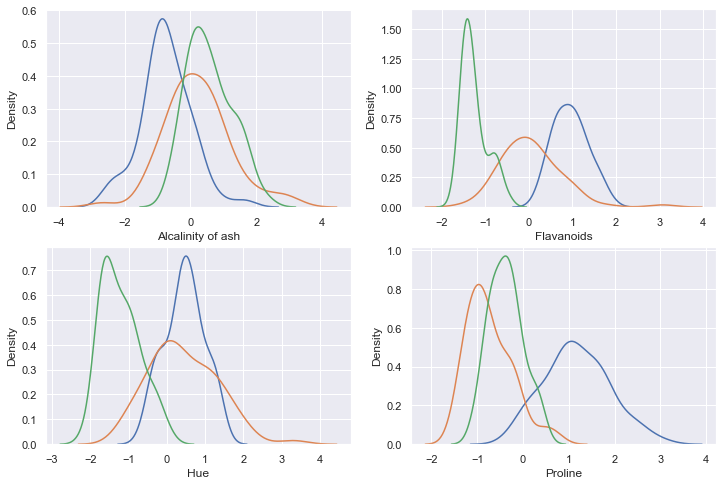

In [27]:
sb.set(style='darkgrid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

sb.kdeplot(data=X_scaled[df['Cultivar']==1,3], ax=ax[0,0])
sb.kdeplot(data=X_scaled[df['Cultivar']==2,3], ax=ax[0,0])
sb.kdeplot(data=X_scaled[df['Cultivar']==3,3], ax=ax[0,0])
ax[0,0].set_xlabel('Alcalinity of ash')

sb.kdeplot(data=X_scaled[df['Cultivar']==1,6], ax=ax[0,1])
sb.kdeplot(data=X_scaled[df['Cultivar']==2,6], ax=ax[0,1])
sb.kdeplot(data=X_scaled[df['Cultivar']==3,6], ax=ax[0,1])
ax[0,1].set_xlabel('Flavanoids')

sb.kdeplot(data=X_scaled[df['Cultivar']==1,10], ax=ax[1,0])
sb.kdeplot(data=X_scaled[df['Cultivar']==2,10], ax=ax[1,0])
sb.kdeplot(data=X_scaled[df['Cultivar']==3,10], ax=ax[1,0])
ax[1,0].set_xlabel('Hue')

sb.kdeplot(data=X_scaled[df['Cultivar']==1,12], ax=ax[1,1])
sb.kdeplot(data=X_scaled[df['Cultivar']==2,12], ax=ax[1,1])
sb.kdeplot(data=X_scaled[df['Cultivar']==3,12], ax=ax[1,1])
ax[1,1].set_xlabel('Proline')

plt.show()

Perform PCA with 4 principal components on the scaled numpy array.

In [11]:
pca = PCA(n_components=4)
pc = pca.fit_transform(X_scaled)
pc

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01,
        -2.15631188e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00,
        -2.91358318e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01,
         7.24902309e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01,
         5.67983308e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00,
        -4.09765788e-01],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01,
        -5.15637495e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01,
        -6.58305046e-02],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01,
        -1.19260801e+00],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00,
         5.62703612e-02],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01,
         3.49381568e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01,
         2.68417600e-02],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00,
      

Print the ratios of explained variance captured by each of the 4 principal components.

In [12]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ])

Print the percentage of original information captured with 4 principal components.

In [13]:
pca.explained_variance_ratio_.sum()

0.7359899907589929

Print all the explained variance ratios for all possible number of principal components after 4.

Print the minimum number of principal components needed to capture at least 85% of the original information of our dataset.

In [14]:
min = -1

for i in range(5, X_scaled.shape[1] + 1):
    pca = PCA(n_components=i)
    pc = pca.fit_transform(X_scaled)
    print(i, pca.explained_variance_ratio_.sum())
    if min == -1 and pca.explained_variance_ratio_.sum() >= 0.85:
        min = i
        
print("\nMin no. of principal components needed =", min)

5 0.8016229275554788
6 0.8509811607477046
7 0.8933679539739378
8 0.9201754434577264
9 0.9423969775056235
10 0.9616971684450643
11 0.9790655253449634
12 0.9920478511010055
13 1.0

Min no. of principal components needed = 6
